In [1]:
import pandas as pd
import csv
atta_stats = pd.read_csv('./data/stats_ATTASIDOR.txt',
                    header = None, delim_whitespace=True, quoting=csv.QUOTE_NONE, encoding='utf-8')
gp_stats = pd.read_csv('./data/stats_GP2013.txt',
                    header = None, delim_whitespace=True, quoting=csv.QUOTE_NONE, encoding='utf-8')

FileNotFoundError: File b'./data/stats_ATTASIDOR.txt' does not exist

In [2]:
cols = ['ordform', 'ordklass', 'lemgram', 'sammansättningsanalys', 'rå_frekvens', 'rel_frekvens']
atta_stats.columns = cols
gp_stats.columns = cols

NameError: name 'atta_stats' is not defined

In [ ]:
atta_stats['pos'] = atta_stats['ordklass'].apply(lambda x: x.split('.')[0])
gp_stats['pos'] = gp_stats['ordklass'].apply(lambda x: x.split('.')[0])

In [ ]:
target_pos = ['JJ', 'VB', 'NN']

pos_df = pd.DataFrame()
pos_df['GP2013'] = gp_stats.groupby('pos')['pos'].count()[target_pos]
pos_df['8Sidor'] = atta_stats.groupby('pos')['pos'].count()[target_pos]

In [ ]:
pos_df

In [3]:
import pandas as pd
#pd.read_csv('./data/')'
atta_df = pd.read_csv('/scratch/gussteen/final_project/attasidor.csv')
gp_df = pd.read_csv('/scratch/gussteen/final_project/gp2013_sample.csv')

In [4]:
atta_df.head()

,lemma,msd,pos,sent_id,word
0,|åtta|,RG.NOM,RG,9a33d49f-9a97adab,Åtta
1,|politiker|,NN.UTR.PLU.IND.NOM,NN,9a33d49f-9a97adab,politiker
2,|ställa|ställa upp|,VB.PRS.AKT,VB,9a33d49f-9a97adab,ställer
3,|upp|ställa upp:3|,PL,PL,9a33d49f-9a97adab,upp
4,|i|,PP,PP,9a33d49f-9a97adab,i


In [5]:
atta_sent_len = atta_df.groupby('sent_id')['word'].apply(len)
gp_sent_len = gp_df.groupby('sent_id')['word'].apply(len)

In [6]:
import matplotlib.pyplot as plt
import numpy as np
bins = np.linspace(0, 40, 40)
plt.hist([atta_sent_len, gp_sent_len], bins, alpha = 0.5, label=['8 Sidor', 'GP2013'], density=True)
plt.legend()
plt.show()

/usr/lib64/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


<Figure size 640x480 with 1 Axes>

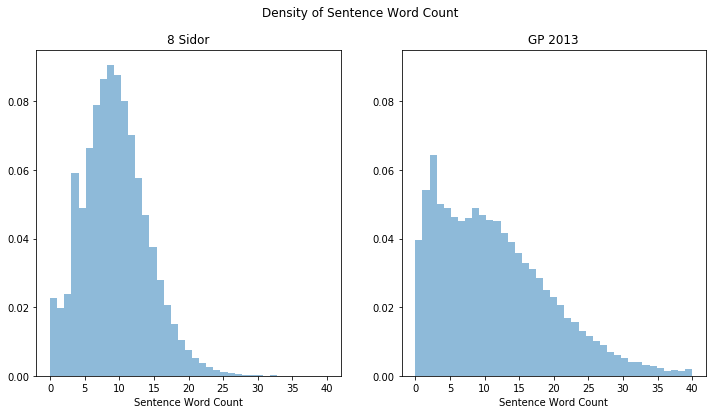

In [25]:
bins = np.linspace(0, 40, 40)
fig = plt.figure(1)
ax = plt.subplot(121)
plt.hist(atta_sent_len, bins, alpha = 0.5, label='8 Sidor', density=True)
plt.title('8 Sidor')
plt.xlabel('Sentence Word Count')
plt.subplot(122, sharey=ax)
plt.hist(gp_sent_len, bins, alpha = 0.5, label='GP 2013', density=True)
plt.title('GP 2013')
plt.xlabel('Sentence Word Count')
fig.set_size_inches((12,6))
fig.suptitle('Density of Sentence Word Count')
plt.savefig('./results/word_count_density.png')